<a href="https://colab.research.google.com/github/Nihala-RI/Machine-Learning/blob/main/Car_mileage_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('/content/mtcars.csv')

In [ ]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.shape

(32, 11)

In [ ]:
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [ ]:
df[df.duplicated()]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


In [ ]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


<Axes: >

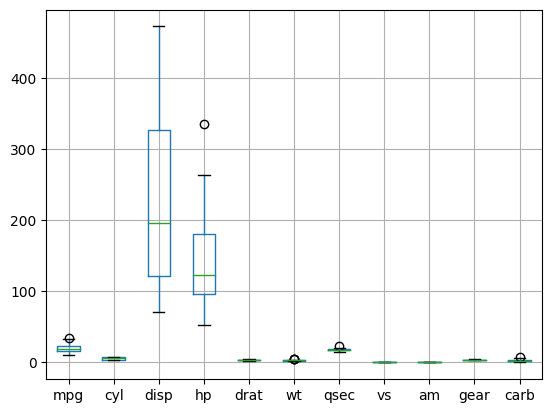

In [ ]:
df.boxplot()

<ipython-input-12-72c16914290b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

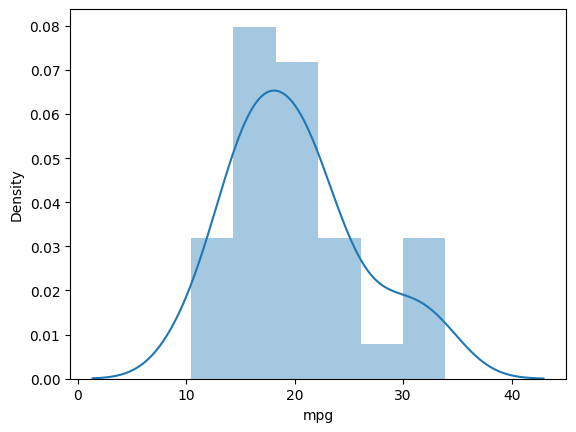

In [ ]:
sns.distplot(df['mpg'])

<ipython-input-13-9dde82167b85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cyl'])


<Axes: xlabel='cyl', ylabel='Density'>

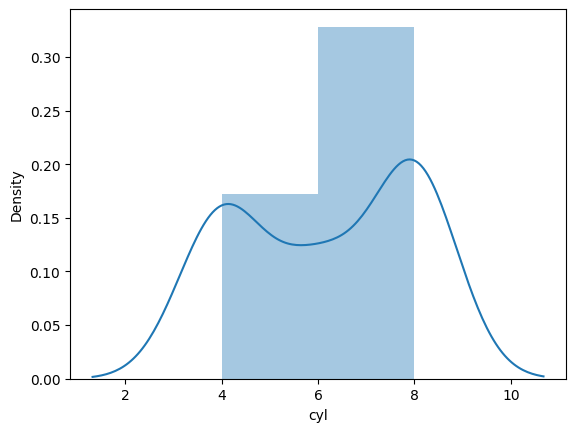

In [ ]:
sns.distplot(df['cyl'])

In [ ]:
x=df.iloc[:,1:]
y=df['mpg']

In [ ]:
x2=sm.add_constant(x)

In [ ]:
x2.head()

,const,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,1.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,1.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,1.0,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,1.0,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
model=sm.OLS(y,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           3.79e-07
Time:                        14:44:02   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x.shape

(32, 10)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=[variance_inflation_factor(x.values,j) for j in range(x.shape[1])]
vif_df=pd.DataFrame({'VIF':vif},index=x.columns)
vif_df

,VIF
cyl,112.629828
disp,98.930791
hp,56.047781
drat,132.214353
wt,182.948049
qsec,317.534376
vs,8.752581
am,7.412020
gear,119.804879
carb,32.213836


<Axes: >

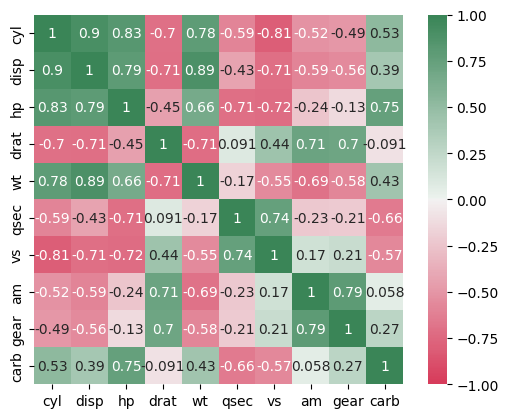

In [ ]:
sns.heatmap(x.corr(),vmin=-1,vmax=1,center=0,annot=True,cmap=sns.diverging_palette(5,500,n=500),square=True)

In [ ]:
model.pvalues

const    0.518124
cyl      0.916087
disp     0.463489
hp       0.334955
drat     0.635278
wt       0.063252
qsec     0.273941
vs       0.881423
am       0.233990
gear     0.665206
carb     0.812179
dtype: float64

In [ ]:
vif_df['P-values']=model.pvalues[1:]
vif_df

,VIF,P-values
cyl,112.629828,0.916087
disp,98.930791,0.463489
hp,56.047781,0.334955
drat,132.214353,0.635278
wt,182.948049,0.063252
qsec,317.534376,0.273941
vs,8.752581,0.881423
am,7.412020,0.233990
gear,119.804879,0.665206
carb,32.213836,0.812179


# The correlation which are greater than 0.70

**cyl:{vs,wt,drat,hp,disp}->wt**
disp:{vs,wt,drat,hp}
**hp:{carb,vs,qsec}->qsec**
**drat:{gear,am,wt}->am,wt**
qsec:{vs} ->
am:{gear} ->

In [ ]:
x3=x2[['const','am','wt','qsec']]
model=sm.OLS(y,x3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.21e-11
Time:                        12:42:47   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.178      -4.638      23.874
am             2.9358      1.411      2.081      0.047       0.046       5.826
wt            -3.9165      0.711     -5.507      0.000      -5.373      -2.460
qsec           1.2259      0.289      4.247      0.000       0.635       1.817
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.213
Skew:                           0.540   Prob(JB):                        0.331
Kurtosis:                       2.297   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

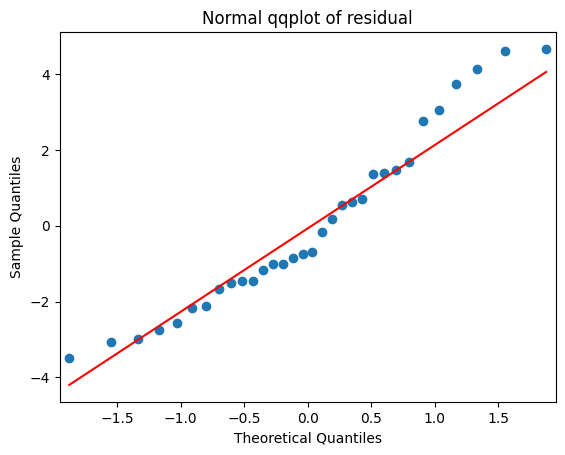

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal qqplot of residual')
plt.show()

In [ ]:
model.rsquared_adj,model.aic

(0.8335560802576044, 152.11937086890117)

In [ ]:
newdata=pd.DataFrame({'const':1, 'cyl':4	,'disp':250	,'hp':110	,'drat':3.70	,'wt':3.0	,'qsec':17	,'vs':1	,'am':1	,'gear':4	,'carb':2},index=[1])

In [ ]:
newdata

,const,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,1,4,250,110,3.7,3.0,17,1,1,4,2


In [ ]:
ypredicted=model.predict(newdata)
ypredicted

1    23.613284
dtype: float64

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [ ]:
print(regr.coef_)

[-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]


In [ ]:
regr.intercept_

12.30337415599622

In [ ]:
regr.predict([[8,360.0,175,3.15,3.440,17.02,0,0,3,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.69343403])